# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

In /opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [2]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("NEWS_API_KEY2")

In [3]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
bitcoin_news = newsapi.get_everything(q="bitcoin", language="en")
bitcoin_articles = bitcoin_news["articles"]

In [122]:
# Fetch the Ethereum news articles
ethereum_news = newsapi.get_everything(q="ethereum", language="en")
ethereum_articles = ethereum_news["articles"]
ethereum_articles[0]

{'source': {'id': 'the-verge', 'name': 'The Verge'},
 'author': 'Adi Robertson',
 'title': 'India will reportedly introduce bill to make owning cryptocurrency illegal',
 'description': 'India’s legislature is reportedly considering a near-total ban on private cryptocurrencies like Bitcoin or Ethereum, including owning the virtual currency. The government has discussed plans for a national digital currency as an alternative.',
 'url': 'https://www.theverge.com/2021/3/15/22332677/india-cryptocurrency-trading-mining-possession-ban-law-report',
 'urlToImage': 'https://cdn.vox-cdn.com/thumbor/IdgNJaOIQBsN8QbQcH2MDU6sAUA=/0x243:2040x1311/fit-in/1200x630/cdn.vox-cdn.com/uploads/chorus_asset/file/10432811/mdoying_180308_2373_0091still.jpg',
 'publishedAt': '2021-03-15T22:25:02Z',
 'content': 'One of the strictest crackdowns worldwide\r\nPhoto by Michele Doying / The Verge\r\nIndia is reportedly moving forward with a sweeping ban on cryptocurrencies. According to Reuters, the countrys legislat…

In [125]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_content=[]
counter=0
for article in bitcoin_articles:
    bitcoin_content.append(bitcoin_articles[counter]["content"])
    counter+=1

bitcoin_content_df = pd.DataFrame({
    "text": bitcoin_content
})


# Create dictionary to hold sentiment scores
bitcoin_sentiment = {
    "Compound": [],
    "Negative": [],
    "Neutral": [],
    "Positive": []
}

# Perform sentiment analysis on Bitcoin articles
for row in bitcoin_content_df.iterrows():
    bitcoin_analysis = analyzer.polarity_scores(row[1]["text"])
    bitcoin_sentiment["Compound"].append(bitcoin_analysis["compound"])
    bitcoin_sentiment["Negative"].append(bitcoin_analysis["neg"])
    bitcoin_sentiment["Neutral"].append(bitcoin_analysis["neu"])
    bitcoin_sentiment["Positive"].append(bitcoin_analysis["pos"])

# Joining sentiment analysis 
bitcoin_analysis_df = pd.DataFrame.from_dict(bitcoin_sentiment)
bitcoin_df = pd.concat([bitcoin_analysis_df, bitcoin_content_df], axis=1)  
bitcoin_df.head()
bitcoin_df.to_csv('bitcoin_df.csv', index=False)

In [7]:
# Create the ethereum sentiment scores DataFrame
ethereum_content=[]
counter=0
for article in ethereum_articles:
    ethereum_content.append(ethereum_articles[counter]["content"])
    counter+=1

ethereum_content_df = pd.DataFrame({
    "text" : ethereum_content
})

# Create dictionary to hold sentiment scores
ethereum_sentiment = {
    "Compound": [],
    "Negative": [],
    "Neutral": [],
    "Positive": []
}

# Perform sentiment analysis on Ethereum articles
for row in ethereum_content_df.iterrows():
    ethereum_analysis = analyzer.polarity_scores(row[1]["text"])
    ethereum_sentiment["Compound"].append(ethereum_analysis["compound"])
    ethereum_sentiment["Negative"].append(ethereum_analysis["neg"])
    ethereum_sentiment["Neutral"].append(ethereum_analysis["neu"])
    ethereum_sentiment["Positive"].append(ethereum_analysis["pos"])

ethereum_analysis_df = pd.DataFrame(ethereum_sentiment)
ethereum_df = pd.concat([ethereum_analysis_df,ethereum_content_df], axis=1)
ethereum_df.head()

,Compound,Negative,Neutral,Positive,text
0,-0.5574,0.110,0.890,0.000,One of the strictest crackdowns worldwide\r\nP...
1,0.0772,0.000,0.961,0.039,Whether youre looking to make a larger investm...
2,0.0000,0.000,1.000,0.000,Famed auction house Christies just sold its fi...
3,0.0000,0.000,1.000,0.000,Payment card network Visa has announced that t...
4,0.5650,0.093,0.735,0.172,The NFT craze has been an intriguing moment fo...


In [8]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.208190,0.028250,0.898050,0.073700
std,0.366353,0.047327,0.082335,0.067464
min,-0.557400,0.000000,0.709000,0.000000
25%,0.000000,0.000000,0.863250,0.029250
50%,0.318200,0.000000,0.925000,0.066000
75%,0.366350,0.054500,0.940250,0.085500
max,0.771700,0.142000,1.000000,0.240000


In [9]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.020075,0.039850,0.917550,0.042650
std,0.321552,0.048404,0.077935,0.050402
min,-0.557400,0.000000,0.735000,0.000000
25%,-0.250000,0.000000,0.909500,0.000000
50%,0.000000,0.000000,0.934000,0.019500
75%,0.307000,0.080750,0.970750,0.077750
max,0.565000,0.145000,1.000000,0.172000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin

Q: Which coin had the highest compound score?

A: Bitcoin

Q. Which coin had the highest positive score?

A: Bitcoin

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [88]:
# Expand the default stopwords list if necessary
sw_addon = {'youre', 'whether', 'said', 'also', 'like', 'seen', 'chars', 'arent', 'according', 'first', 'one', 'make', 'allowed', 'got', 'made'}

In [89]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    sw = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    regex = re.compile("[^a-zA-Z ]")
    # Remove punctuation
    content_clean = [regex.sub('', text)]
    # Tokenize words
    word_tokenized = [word_tokenize(i) for i in content_clean]
    # Convert the words to lowercase and remove stop words
    lower_tokenized = [word.lower() for words in word_tokenized for word in words if word.lower() not in sw.union(sw_addon)]
    print(lower_tokenized)
    # Lemmatize Words into root words
    tokens = [lemmatizer.lemmatize(word) for word in lower_tokenized]
    return tokens

In [90]:
# Create a new tokens column for bitcoin
bitcoin_tokens = [tokenizer(article) for article in bitcoin_content]
bitcoin_df["tokens"] = bitcoin_tokens

['looking', 'larger', 'investment', 'want', 'dabble', 'cryptocurrencies', 'purchase', 'bitcoin', 'ethereum', 'bitcoin', 'cash', 'litecoin', 'paypal', 'soon', 'youll', 'ab']
['promised', 'earlier', 'year', 'tesla', 'accepts', 'payment', 'bitcoin', 'teslas', 'website', 'tweet', 'ceo', 'elon', 'musk', 'subsequent', 'tweet', 'musk', 'bitcoin', 'paid', 'tesla']
['inevitable', 'happened', 'purchase', 'tesla', 'vehicle', 'bitcointhis', 'tesla', 'ceo', 'pardon', 'technoking', 'elon', 'musk', 'tweeted', 'wednesdayyou', 'buy', 'tesla']
['tesla', 'headlines', 'earlier', 'year', 'took', 'significant', 'holdings', 'bitcoin', 'acquiring', 'roughly', 'billion', 'stake', 'thenprices', 'early', 'february', 'time', 'noted', 'sec']
['national', 'burrito', 'day', 'lands', 'april', 'fools', 'day', 'year', 'thankfully', 'restaurants', 'playing', 'around', 'deals', 'starting', 'tomorrow', 'restaurants', 'pollo', 'loco', 'moes', 'southwest', 'grill']
['strictest', 'crackdowns', 'worldwidephoto', 'michele', 'd

In [91]:
# Create a new tokens column for ethereum
ethereum_tokens = [tokenizer(article) for article in ethereum_content]
ethereum_df["tokens"] = ethereum_tokens

['strictest', 'crackdowns', 'worldwidephoto', 'michele', 'doying', 'vergeindia', 'reportedly', 'moving', 'forward', 'sweeping', 'ban', 'cryptocurrencies', 'reuters', 'countrys', 'legislat']
['looking', 'larger', 'investment', 'want', 'dabble', 'cryptocurrencies', 'purchase', 'bitcoin', 'ethereum', 'bitcoin', 'cash', 'litecoin', 'paypal', 'soon', 'youll', 'ab']
['famed', 'auction', 'house', 'christies', 'sold', 'purely', 'digital', 'piece', 'art', 'whopping', 'million', 'price', 'buyer', 'digital', 'file', 'collage', 'images', 'complex', 'legac']
['payment', 'card', 'network', 'visa', 'announced', 'transactions', 'settled', 'using', 'usd', 'coin', 'usdc', 'stablecoin', 'powered', 'ethereum', 'blockchain', 'cryptocom', 'company', 'test', 'new', 'capabi']
['nft', 'craze', 'intriguing', 'moment', 'digital', 'artists', 'great', 'leaps', 'tech', 'create', 'work', 'much', 'progress', 'shifting', 'profit']
['move', 'fast', 'break', 'things', 'get', 'hackedthats', 'happened', 'roll', 'social', 

---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [92]:
from collections import Counter
from nltk import ngrams

In [93]:
# Generate the Bitcoin N-grams where N=2
bitcoin_words = []
for word in bitcoin_tokens:
    bitcoin_words.extend(word)
bitcoin_ngrams = Counter(ngrams(bitcoin_words, n=2))
dict(bitcoin_ngrams)

{('looking', 'larger'): 1,
 ('larger', 'investment'): 1,
 ('investment', 'want'): 1,
 ('want', 'dabble'): 1,
 ('dabble', 'cryptocurrencies'): 1,
 ('cryptocurrencies', 'purchase'): 1,
 ('purchase', 'bitcoin'): 1,
 ('bitcoin', 'ethereum'): 1,
 ('ethereum', 'bitcoin'): 1,
 ('bitcoin', 'cash'): 1,
 ('cash', 'litecoin'): 1,
 ('litecoin', 'paypal'): 1,
 ('paypal', 'soon'): 1,
 ('soon', 'youll'): 1,
 ('youll', 'ab'): 1,
 ('ab', 'promised'): 1,
 ('promised', 'earlier'): 1,
 ('earlier', 'year'): 2,
 ('year', 'tesla'): 1,
 ('tesla', 'accepts'): 1,
 ('accepts', 'payment'): 1,
 ('payment', 'bitcoin'): 1,
 ('bitcoin', 'tesla'): 1,
 ('tesla', 'website'): 1,
 ('website', 'tweet'): 1,
 ('tweet', 'ceo'): 1,
 ('ceo', 'elon'): 1,
 ('elon', 'musk'): 2,
 ('musk', 'subsequent'): 1,
 ('subsequent', 'tweet'): 1,
 ('tweet', 'musk'): 1,
 ('musk', 'bitcoin'): 1,
 ('bitcoin', 'paid'): 1,
 ('paid', 'tesla'): 1,
 ('tesla', 'inevitable'): 1,
 ('inevitable', 'happened'): 1,
 ('happened', 'purchase'): 1,
 ('purchase',

In [94]:
# Generate the Ethereum N-grams where N=2
ethereum_words = []
for word in ethereum_tokens:
    ethereum_words.extend(word)
ethereum_ngrams = Counter(ngrams(ethereum_words, n=2))
dict(ethereum_ngrams)

{('strictest', 'crackdown'): 1,
 ('crackdown', 'worldwidephoto'): 1,
 ('worldwidephoto', 'michele'): 1,
 ('michele', 'doying'): 1,
 ('doying', 'vergeindia'): 1,
 ('vergeindia', 'reportedly'): 1,
 ('reportedly', 'moving'): 1,
 ('moving', 'forward'): 1,
 ('forward', 'sweeping'): 1,
 ('sweeping', 'ban'): 1,
 ('ban', 'cryptocurrencies'): 1,
 ('cryptocurrencies', 'reuters'): 1,
 ('reuters', 'country'): 1,
 ('country', 'legislat'): 1,
 ('legislat', 'looking'): 1,
 ('looking', 'larger'): 1,
 ('larger', 'investment'): 1,
 ('investment', 'want'): 1,
 ('want', 'dabble'): 1,
 ('dabble', 'cryptocurrencies'): 1,
 ('cryptocurrencies', 'purchase'): 1,
 ('purchase', 'bitcoin'): 1,
 ('bitcoin', 'ethereum'): 1,
 ('ethereum', 'bitcoin'): 1,
 ('bitcoin', 'cash'): 1,
 ('cash', 'litecoin'): 1,
 ('litecoin', 'paypal'): 1,
 ('paypal', 'soon'): 1,
 ('soon', 'youll'): 1,
 ('youll', 'ab'): 1,
 ('ab', 'famed'): 1,
 ('famed', 'auction'): 1,
 ('auction', 'house'): 1,
 ('house', 'christie'): 1,
 ('christie', 'sold')

In [95]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [96]:
# Get the top 10 words for Bitcoin
bitcoin_top_words = token_count(bitcoin_words, N=10)
bitcoin_top_words

[('bitcoin', 14),
 ('tesla', 7),
 ('year', 5),
 ('cryptocurrencies', 4),
 ('reuters', 4),
 ('new', 4),
 ('paypal', 3),
 ('earlier', 3),
 ('musk', 3),
 ('crypto', 3)]

In [97]:
# Get the top 10 words for Ethereum
ethereum_top_words = token_count(ethereum_words, N=10)
ethereum_top_words

[('cryptocurrency', 5),
 ('reuters', 4),
 ('ethereum', 4),
 ('new', 4),
 ('cryptocurrencies', 3),
 ('country', 3),
 ('bitcoin', 3),
 ('digital', 3),
 ('million', 3),
 ('company', 3)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [98]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

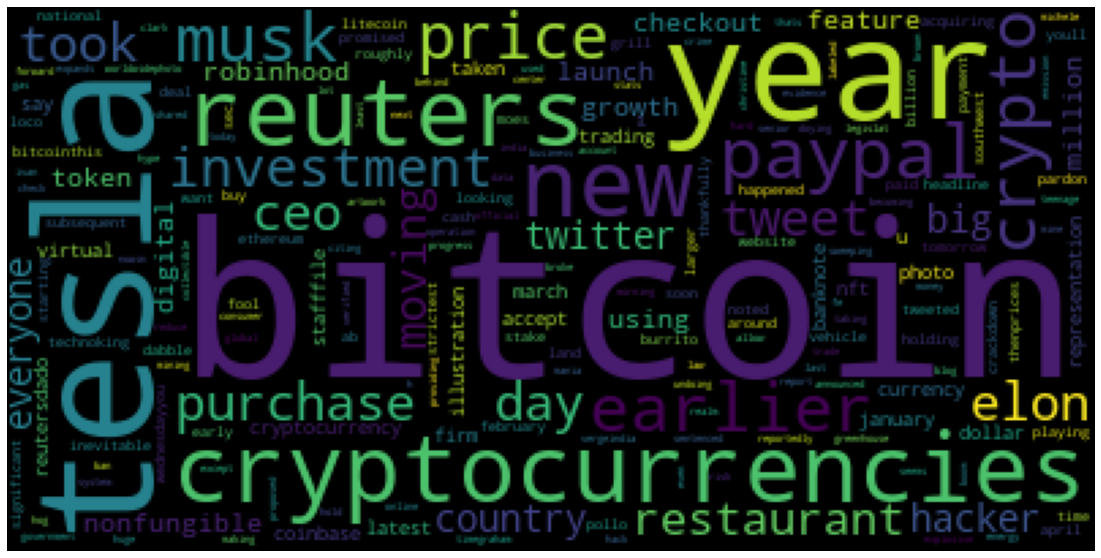

In [132]:
# Generate the Bitcoin word cloud
wc = WordCloud()
bitcoin_string = ' '.join(bitcoin_words)
bitcoin_wordcloud = wc.generate(bitcoin_string)
plt.imshow(bitcoin_wordcloud);
plt.axis("off");

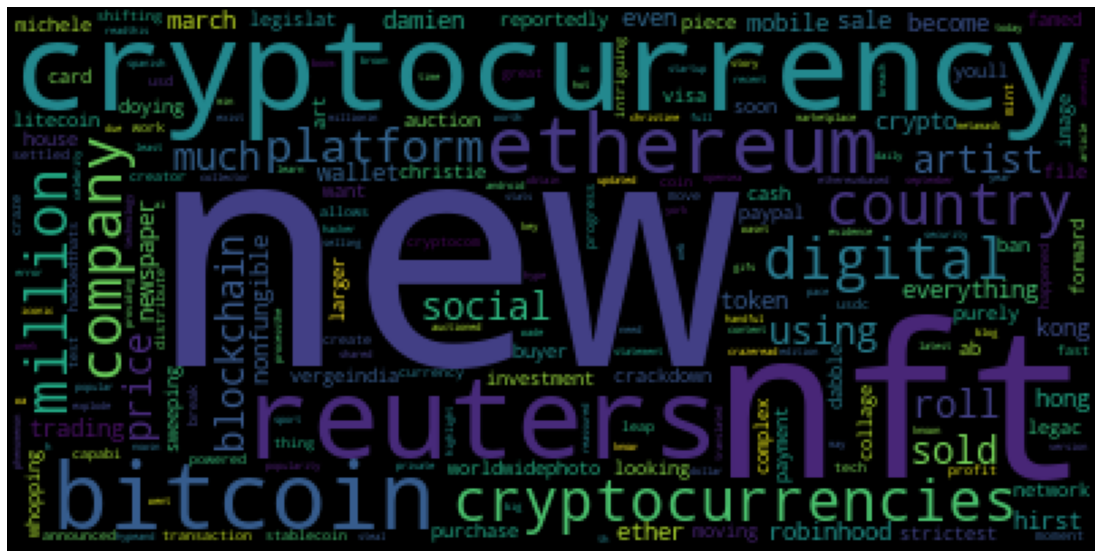

In [131]:
# Generate the Ethereum word cloud
ethereum_string = ' '.join(ethereum_words)
ethereum_wordcloud = wc.generate(ethereum_string)
plt.imshow(ethereum_wordcloud);
plt.axis("off");

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [108]:
import spacy
from spacy import displacy

In [109]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [110]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [141]:
# Concatenate all of the bitcoin text together
bitcoin_text = ''.join(bitcoin_content)

In [142]:
# Run the NER processor on all of the text
bitcoin_ner = nlp(bitcoin_text)

# Add a title to the document
bitcoin_ner.user_data["title"] = "Bitcoin NER"

In [143]:
# Render the visualization
displacy.render(bitcoin_ner, style='ent')

In [151]:
# List all Entities
print(bitcoin_ner.user_data["title"])
for ent in bitcoin_ner.ents:
    print(ent.text, ent.label_)

Bitcoin NER
Bitcoin, Ethereum ORG
Bitcoin Cash PERSON
earlier this year DATE
Tesla ORG
Bitcoin PERSON
Tesla ORG
Elon Musk PERSON
Musk PERSON
Tesla ORG
Tesla ORG
Bitcoin PERSON
Elon Musk PERSON
Wednesday DATE
earlier this year DATE
roughly $1.5 billion MONEY
early February DATE
SEC ORG
Burrito Day PERSON
April Fools Day DATE
this year DATE
tomorrow DATE
Pollo Loco FAC
Photo PERSON
Michele Doying PERSON
India GPE
Reuters ORG
last years DATE
Twitter PRODUCT
Graham Ivan Clark PERSON
Twitters NORP
India GPE
Reuters ORG
a big year DATE
Robinhood ORG
today DATE
Christine Brown PERSON
Robinhoods PERSON
millions CARDINAL
Funko PERSON
NFT ORG
TokenWave ORG
23, 2021 DATE
Spanish NORP
AI ORG
Bitcoin PERSON
the United States GPE
FD Funds Management LLC ORG
Reuters ORG
Bitcoin PERSON
U.S. GPE
January 8, 2021 DATE
Dado Ru PERSON
Reuters ORG
Bitcoin PERSON
U.S. GPE
January 27, 2020 DATE
PayPal PERSON
Julian Satterthwaite PERSON
March 26 DATE
the Wall Street Journal ORG
the Commodity Futures Trading Co

---

## Ethereum NER

In [31]:
# Concatenate all of the ethereum text together
# YOUR CODE HERE!

In [32]:
# Run the NER processor on all of the text
# YOUR CODE HERE!

# Add a title to the document
# YOUR CODE HERE!

In [33]:
# Render the visualization
# YOUR CODE HERE!

In [34]:
# List all Entities
# YOUR CODE HERE!